In [0]:
!pip install bayesian-optimization
!pip install pyproj

import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from pyproj import Proj,transform
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score   # AUC 스코어 계산
from sklearn.metrics import accuracy_score,log_loss,f1_score
from sklearn.model_selection import KFold,StratifiedKFold   # K-fold CV    
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization  # 베이지안 최적화 라이브러리  
from functools import partial               # 함수 변수 고정
import lightgbm as lgb                      # LightGBM 라이브러리
import warnings       
warnings.filterwarnings("ignore")
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import math

from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


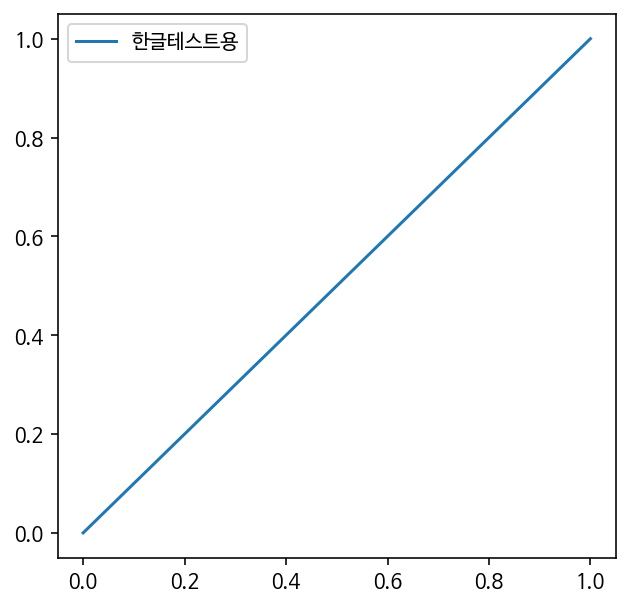

In [0]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# data load

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/sell_십만_150.csv')
#data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market
0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0
1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0
2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0
4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0


In [0]:
# 이진분류
data.loc[data['old_acc']==0,'binary_accident']=0
data.loc[data['old_acc']!=0,'binary_accident']=1

# 파생변수 제작
data['old/building'] = data['old_place']/data['building']
data['child/building'] = data['child_place']/data['building']

In [0]:
X_data=data.drop(['x','y','accident','building','old_place','child_place','child/building','old_acc','binary_accident'],axis=1)
#clusters = data['clusters']
y_data=data['binary_accident']
X_data.replace([np.inf, -np.inf], 0, inplace=True)
X_data.fillna(0,inplace=True)

In [0]:
X_data

,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,crosswork,bus,bohang,market,old/building
0,6,0,0,1,0,0,0,0,5.0,45.0,0.0,0.0,0.000000
1,19,0,0,1,0,0,0,0,4.0,2.0,0.0,0.0,0.004566
2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000
3,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.000000
4,23,0,0,3,0,0,0,0,3.0,4.0,0.0,0.0,0.015504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48307,10,0,0,0,0,0,0,0,4.0,4.0,0.0,0.0,0.005405
48308,0,1,0,1,0,0,0,0,6.0,6.0,0.0,0.0,0.055556
48309,0,0,0,0,0,0,0,0,4.0,2.0,0.0,0.0,0.000000
48310,21,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000


In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=201)
score=[]
for train_index, valid_index in skf.split(X_data,y_data):
  model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                colsample_bytree=0.9189467286009064, importance_type='split',
                learning_rate=0.07534463264445598, max_depth=22,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=2047, n_jobs=-1, num_leaves=510, objective='binary',
                random_state=None, reg_alpha=1.6889796094548561,
                reg_lambda=41.476793753150716, silent=True,
                subsample=0.6154372811267965, subsample_for_bin=200000,
                subsample_freq=0)
  x_train, y_train = X_data.iloc[train_index], y_data.iloc[train_index]
  x_valid, y_valid = X_data.iloc[valid_index], y_data.iloc[valid_index]

  model.fit(x_train,y_train)
  preds=model.predict(x_valid)
  score.append(f1_score(y_valid,preds))

score

[0.8669250645994832,
 0.8817891373801916,
 0.8778280542986425,
 0.8768536428110896,
 0.8670143415906129]

In [0]:
sum(score)/5

0.8740820481360039

# 모델 해석

In [0]:
! pip install shap
import shap

In [0]:
X_importance = X_data

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

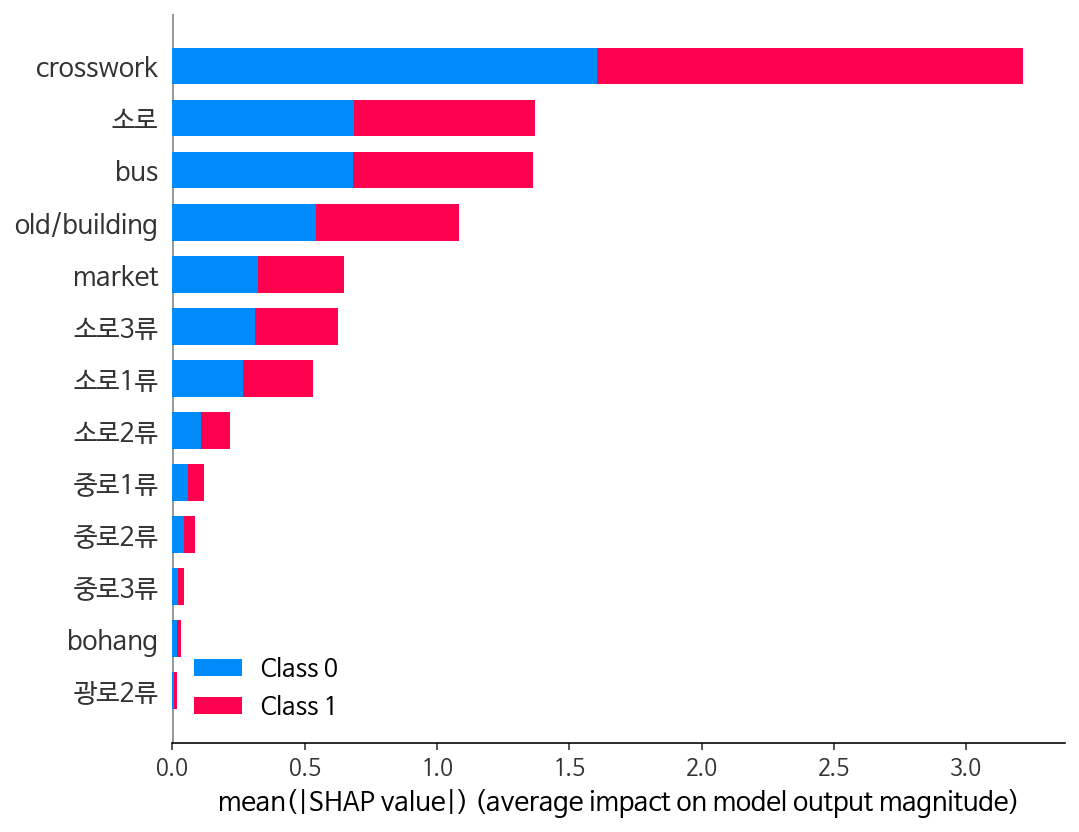

In [0]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

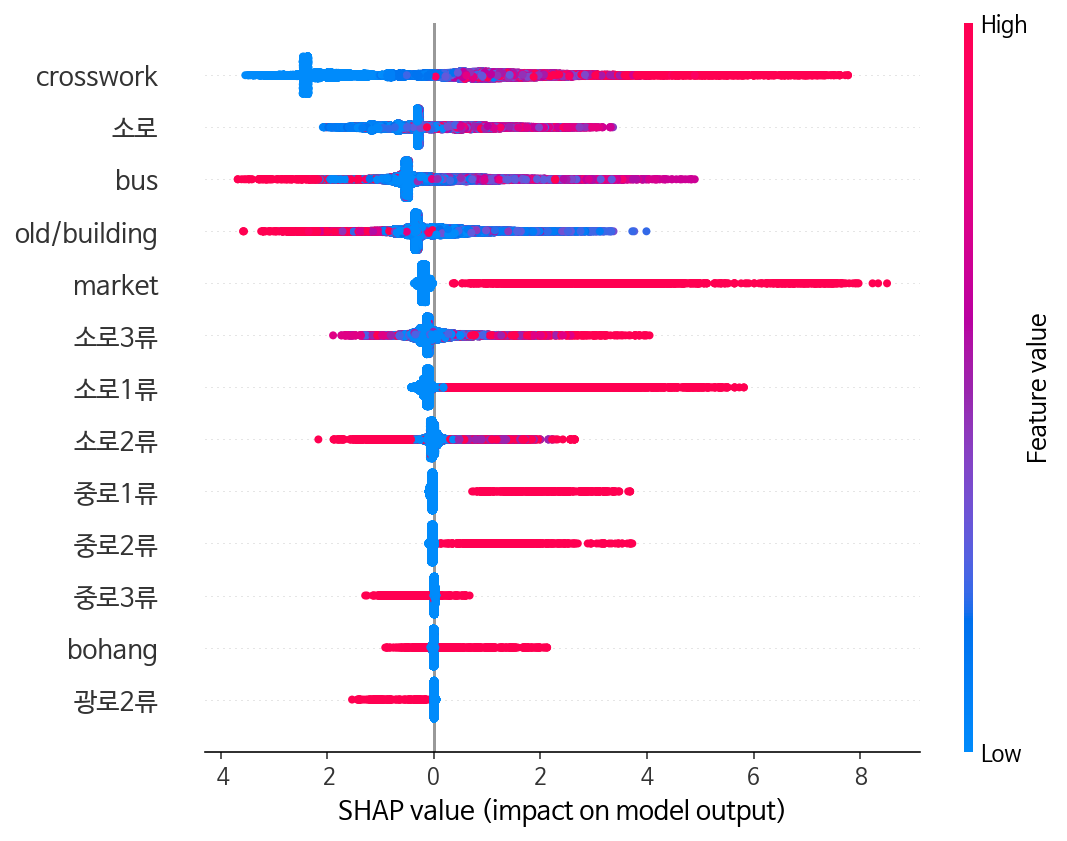

In [0]:
# Plot summary_plot
shap.summary_plot(shap_values[1], X_importance)

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][56,:], X_importance.iloc[56,:])

In [0]:
shap_values[1][56].sum() + explainer.expected_value[1]

-5.1780128764432

# output value 삽입

In [0]:
output=pd.DataFrame(shap_values[1],columns=X_importance.columns)

In [0]:
output.sum(axis=1)

0        0.026564
1        5.708401
2       -3.990256
3       -2.930956
4        7.185704
           ...   
48307    1.092918
48308   -0.427423
48309    1.670181
48310   -3.212995
48311   -3.990256
Length: 48312, dtype: float64

In [0]:
output_values = output.sum(axis=1) + explainer.expected_value[1]

In [0]:
data['output_values'] = output_values

In [0]:
data.head()

,x,y,소로,중로2류,소로1류,소로3류,중로3류,소로2류,중로1류,광로2류,old_place,child_place,crosswork,building,bus,bohang,accident,old_acc,market,binary_accident,old/building,child/building,output_values
0,195600.888993,545928.299315,6,0,0,1,0,0,0,0,0.0,1.0,5.0,93.0,45.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010753,-6.362207
1,194062.308207,544725.091085,19,0,0,1,0,0,0,0,1.0,3.0,4.0,219.0,2.0,0.0,2.0,1.0,0.0,1.0,0.004566,0.013699,-0.680369
2,197377.867009,543986.683138,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-10.379027
3,193058.182323,543489.087262,0,0,0,0,0,0,0,0,0.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,-9.319727
4,197347.383013,542701.828076,23,0,0,3,0,0,0,0,4.0,2.0,3.0,258.0,4.0,0.0,1.0,1.0,0.0,1.0,0.015504,0.007752,0.796933


In [0]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/최종.csv',index=False)